In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


# Baseline models for Glimpse K12. 

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

# Baseline models for dfs with continuous outcome variables = linear regression. 

### Read in the data

In [3]:
most_feats = pd.read_csv('most_feats_cont_feateng.csv')

### Set up dfs for predictor and outcome variables 

In [4]:
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

### Recode categorical strings with number labels and save those dictionaries

In [5]:
# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

### Packages, functions, and algorithms. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### Predicting outcomes for using the 'most features' df. 

Mean Absolute Error: 118.60707950078657
Mean Squared Error: 98597.84280062722
Root Mean Squared Error: 314.00293438219205
R^2 Math:, 0.3230998563247417


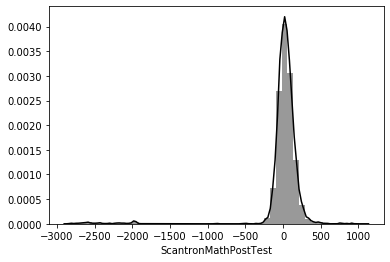

In [7]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Math:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

Mean Absolute Error: 205.13911791735296
Mean Squared Error: 188672.7145761632
Root Mean Squared Error: 434.36472528989185
R^2 Reading:, 0.4372283874129168


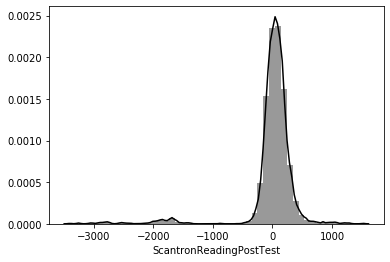

In [8]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Reading:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

# Baseline models for dfs with binary outcome variables = logistics regression. 

In [9]:
most_feats = pd.read_csv('most_feats_binary_feateng.csv')

In [11]:
mostFeats_MathOutc = most_feats['ScantronMathPostTestBenchmarks']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTestBenchmarks']
mostFeats_pred = most_feats.drop(['ScantronMathPostTestBenchmarks', 'ScantronReadingPostTestBenchmarks'], axis=1)

In [12]:
# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [14]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')# font size

## Predicting outcomes for the 'most features' df. 

Accuracy: 0.7810556246667851
Precision: 0.8570822731128075
Recall: 0.6930727023319616
ROC_AUC:, 0.784382164518987
F1: 0.7664012135001896


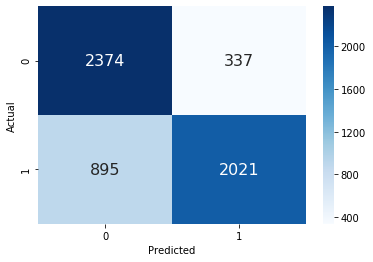

In [15]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)

Accuracy: 0.7764350453172205
Precision: 0.7879984951091046
Recall: 0.9696759259259259
ROC_AUC:, 0.5536979476607441
F1: 0.8694479036944789


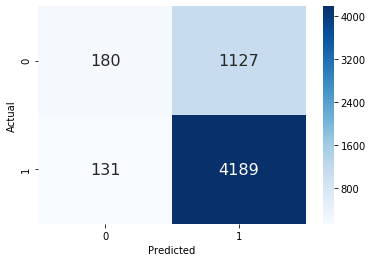

In [16]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)